In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_P8_P11_P14_P28_PHYLUM.csv'
data_df = pd.read_csv(file_path)

# Identify columns associated with different DOLs and map them
dol_mapping = {
    'P8': ['2', '11', '22', '25', '40', '46'],
    'P11': ['073A', '075A', '081A', '083A', '085A', '088A', '097A', '105A', '106A', '107A'],
    'P14': ['137A', '140A', '146A', '151A', '156A', '158A', '161A', '162A', '167A', '235A', '258A', '259A', '260A', '261A'],
    'P28': ['111A', '115A', '119A', '120A', '124A', '129A', '134A', '135A']
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df


,2,11,22,25,40,46,073A,075A,081A,083A,...,167A,215A,226A,227A,228A,235A,258A,259A,260A,261A
class,,,,,,,,,,,,,,,,,,,,,
Actinobacteria,0,0,0,0,0,3,36,23,12,0,...,135,0,0,0,0,0,55,4,0,0
Bacteroidetes,262,247,121,86,124,133,2252,161,26,410,...,7829,14251,56,29,0,37,15228,11376,12784,15518
Firmicutes,25948,17078,15080,18620,14877,15144,23822,25777,25720,25467,...,18478,12318,16080,13179,12232,20114,9554,15119,13774,10924
Patescibacteria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,5,9
Proteobacteria,384,9272,11396,7891,11596,11317,487,636,839,720,...,146,28,10461,13389,14365,6446,1760,96,0,112
Tenericutes,3,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,34,34
DOL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample,2,11,22,25,40,46,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


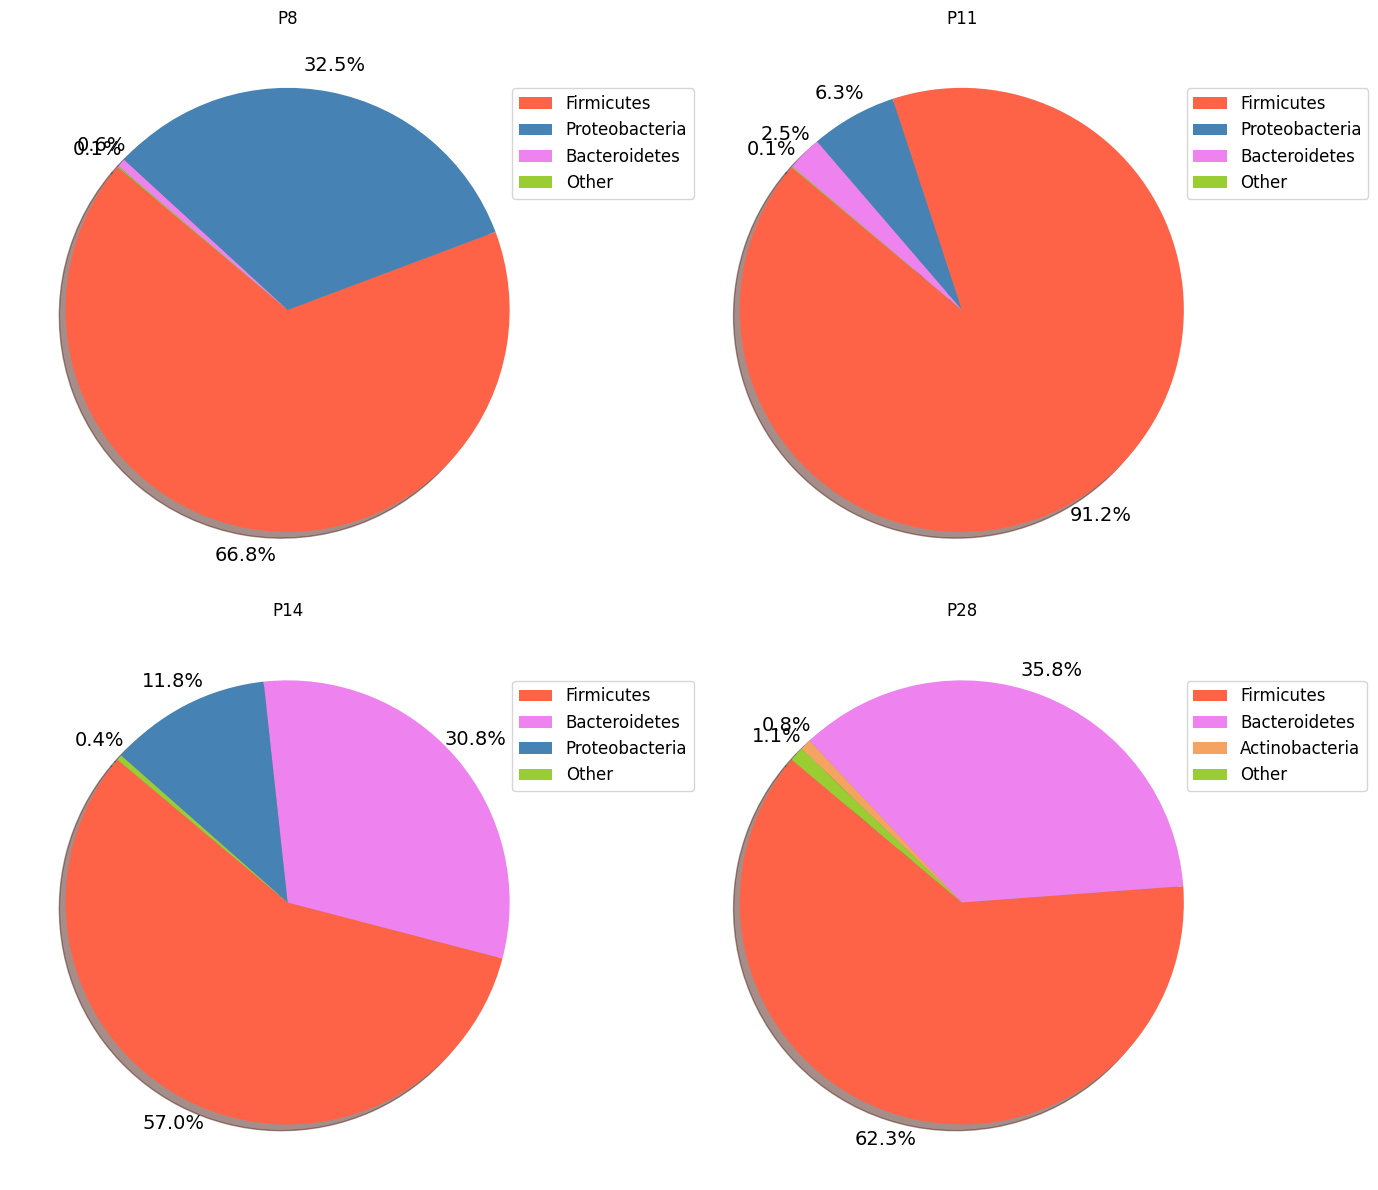

In [6]:
# Define color mapping
color_mapping = {
    'Firmicutes': '#FF6347',
    'Proteobacteria': '#4682B4',
    'Bacteroidetes': '#EE82EE',
    'Actinobacteria': '#F4A460',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.12, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.89, 0.3, 0.5, 1), fontsize='large')

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_P8_P11_P14_P28_GENUS.csv'
data_df = pd.read_csv(file_path)

# Identify columns associated with different DOLs and map them
dol_mapping = {
    'P8': ['2', '11', '22', '25', '40', '46'],
    'P11': ['073A', '075A', '081A', '083A', '085A', '088A', '097A', '105A', '106A', '107A'],
    'P14': ['137A', '140A', '146A', '151A', '156A', '158A', '161A', '162A', '167A', '235A', '258A', '259A', '260A', '261A'],
    'P28': ['111A', '115A', '119A', '120A', '124A', '129A', '134A', '135A']
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df

,2,11,22,25,40,46,073A,075A,081A,083A,...,167A,215A,226A,227A,228A,235A,258A,259A,260A,261A
class,,,,,,,,,,,,,,,,,,,,,
A2,0,0,0,0,0,0,192,9,0,0,...,0,0,0,0,0,0,0,0,0,0
Acetatifactor,0,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,13,0,8
Alistipes,32,24,8,2,9,11,0,0,0,0,...,101,0,5,7,0,0,0,691,1261,1035
Anaeroplasma,3,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,34,34
Anaerotruncus,3,2,1,1,2,0,696,570,4,14,...,16,177,157,0,0,0,18,130,116,75
Angelakisella,0,0,0,0,0,0,29,0,0,0,...,124,0,0,0,0,0,37,284,136,73
ASF356,0,0,0,0,0,0,6,64,0,0,...,0,0,0,0,0,0,0,0,9,0
Bacteroides,26,24,22,9,8,32,0,0,0,0,...,0,4856,42,22,0,37,6573,4340,1258,4563
Bifidobacterium,0,0,0,0,0,3,0,0,6,0,...,0,0,0,0,0,0,55,4,0,0


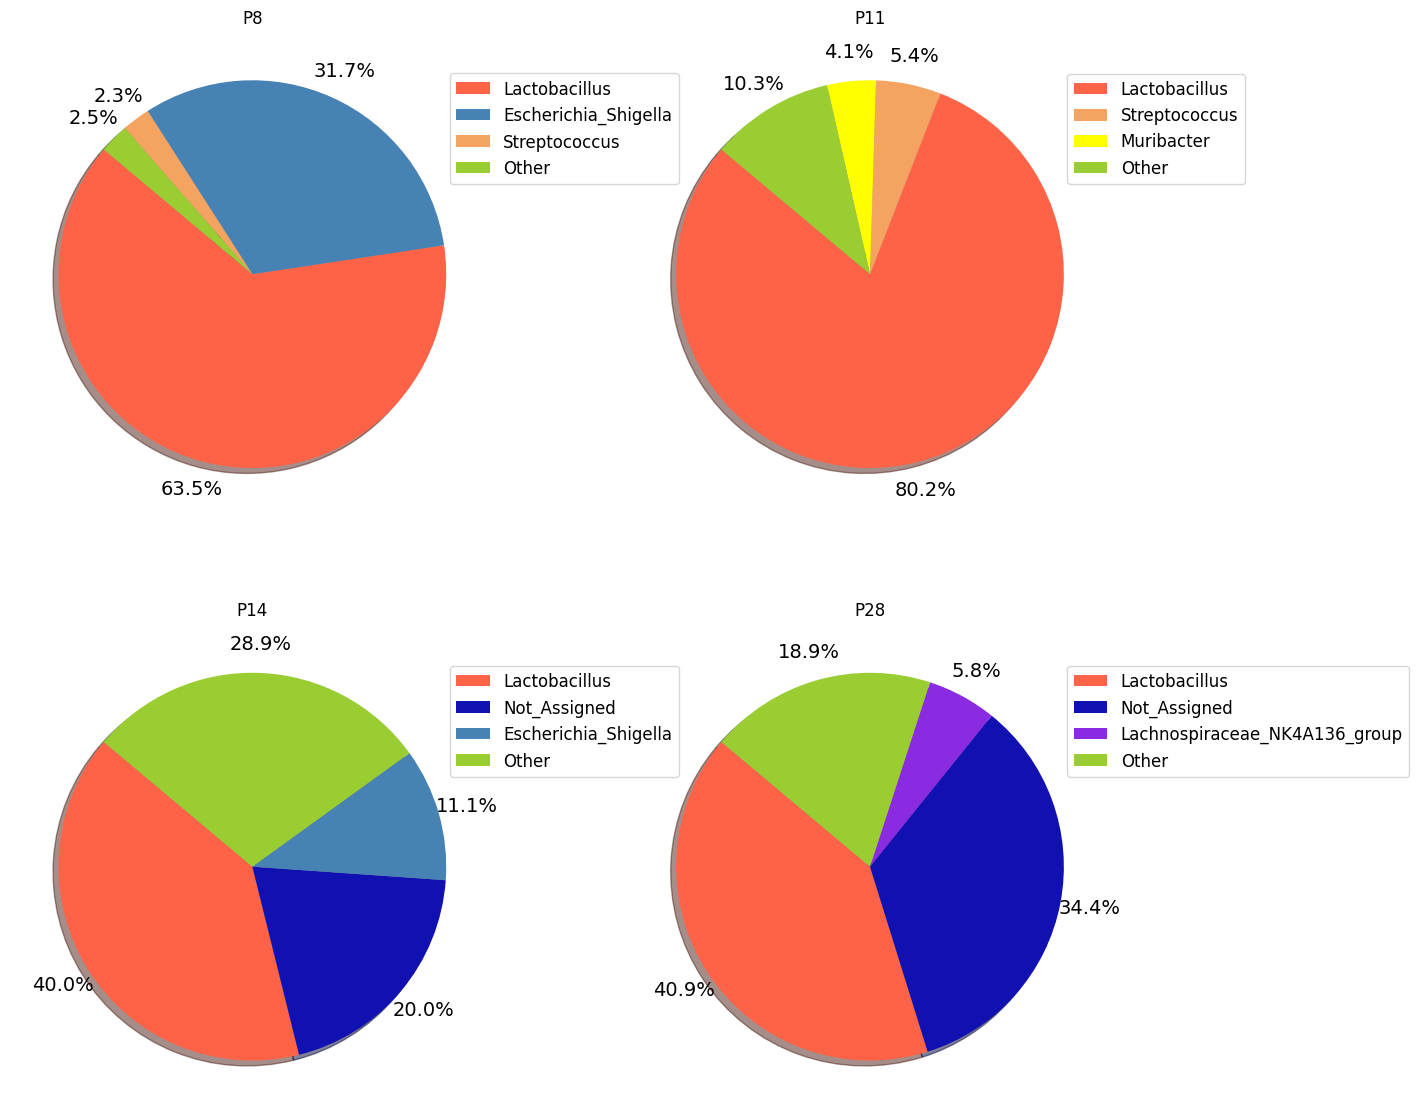

In [8]:
'''
colors = []
for tax in top_five_taxa:
    if tax == 'Lactobacillus':
        colors.append('#FF6347')
    elif tax == 'Escherichia_Shigella':
        colors.append('#4682B4')
    elif tax == 'Not_Assigned':
        colors.append('#FFE4C4')
    elif tax == 'Muribacter':
        colors.append('#F4A460')
    else:
        colors.append('#9ACD32')
'''

# Define color mapping
color_mapping = {
    'Lactobacillus': '#FF6347',
    'Escherichia_Shigella': '#4682B4',
    'Not_Assigned': '#1111B1',
    'Bacteroides': '#EE82EE',
    'Streptococcus': '#F4A460',
    'Muribacter': '#FFFF00',
    'Lachnospiraceae_NK4A136_group': '#8A2BE2',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=1.16, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.89, 0.3, 0.5, 1), fontsize='large')

plt.tight_layout()
plt.show()